# 9 - The Infinte Square Well
## 9.3 A Big Example

Our initial wave function is
$$
\psi(x, 0) = \sqrt{\frac{735}{a}} \left[ \left( \frac{x}{a} \right)^3 - \frac{11}{7} \left( \frac{x}{a} \right)^2 + \frac{4}{7} \left( \frac{x}{a} \right) \right].
$$

Let's plot it up!  I'll set $a = 1$ for niceness.

Text(0, 0.5, '$\\psi(x,0)$')

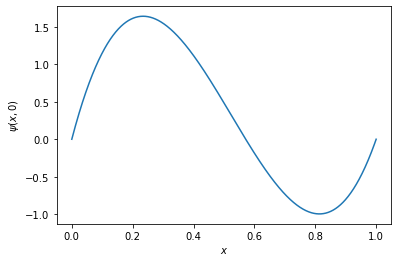

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def psi_0(x):
    return np.sqrt(735) * ( x**3 - 11/7 * x**2 + 4/7 * x)

x = np.linspace(0, 1, 1000)

plt.plot(x, psi_0(x))
plt.xlabel("$x$")
plt.ylabel(r"$\psi(x,0)$")

Let's plot the square as well - that's the probability density.

Text(0, 0.5, '$|\\psi(x,0)|^2$')

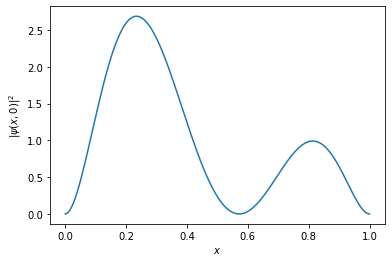

In [2]:
plt.plot(x, np.abs(psi_0(x))**2)
plt.xlabel("$x$")
plt.ylabel(r"$|\psi(x,0)|^2$")

We can calculate some properties as well.  For example, what is the probability of finding the particle between $x = L/2$ and $x = L$?

In [3]:
import scipy.integrate as integrate

P = integrate.quad(lambda x: np.abs(psi_0(x))**2, 0.5, 1)[0]

print(f"The probability of finding the particle between L/2 and L is {P*100:.1f}%.")

The probability of finding the particle between L/2 and L is 22.7%.


Or what is the expectation value $\langle x \rangle$?

In [4]:
x_exp = integrate.quad(lambda x: x * np.abs(psi_0(x))**2, 0, 1)[0]

print(f"The expectation value of x is {x_exp:.3f}.")

The expectation value of x is 0.375.


What about energy probabilities?

In [5]:
def phi(x, n):
    return np.sqrt(2) * np.sin(n * np.pi * x)

c1 = integrate.quad(lambda x: phi(x, 1) * psi_0(x), 0, 1)[0]
P1 = np.abs(c1)**2

print(f"The probability of measuring E_1 is {P1*100:.1f}%.")

The probability of measuring E_1 is 12.5%.


Okay, now for the hard thing. We want to switch to the energy basis.  Rather than copying what we did in class, though (finding the coefficients $c_n$ by hand), let's do it all numerically.

c1 = 0.353
c2 = 0.927
c3 = 0.013
c4 = 0.116


Text(0, 0.5, '$\\psi(x, 0)$')

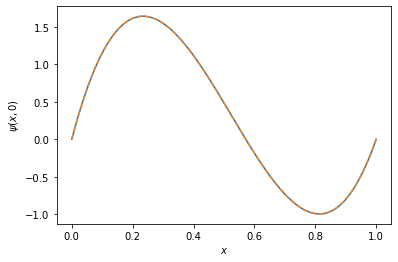

In [6]:
def coef(n):
    c = integrate.quad(lambda x: phi(x, n) * psi_0(x), 0, 1)[0]
    return c

# print the first few coefficients to check our work
print(f"c1 = {coef(1):.3f}\nc2 = {coef(2):.3f}\nc3 = {coef(3):.3f}\nc4 = {coef(4):.3f}")
    
psi_energy = np.zeros(1000)
for i in range(1, 50):
    psi_energy += coef(i) * phi(x, i)

plt.plot(x, psi_0(x))
plt.plot(x, psi_energy, "--")
plt.xlabel("$x$")
plt.ylabel("$\psi(x, 0)$")

What about at a later time?  Add in the time exponentials.

Text(0, 0.5, '$\\psi(x, 0)$')

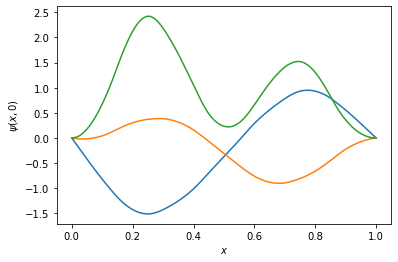

In [7]:
def psi_t(x, t):
    psi_e = 0 + 0j
    for i in range(50):
        n = i+1
        psi_e += coef(n) * phi(x, n) * np.exp(-1j * n**2 * np.pi**2 / 2.0 * t)
    
    return psi_e

z = psi_t(x, 0.5)
plt.plot(x, np.real(z))
plt.plot(x, np.imag(z))
plt.plot(x, np.abs(z)**2)
plt.xlabel("$x$")
plt.ylabel("$\psi(x, 0)$")

<IPython.core.display.Javascript object>


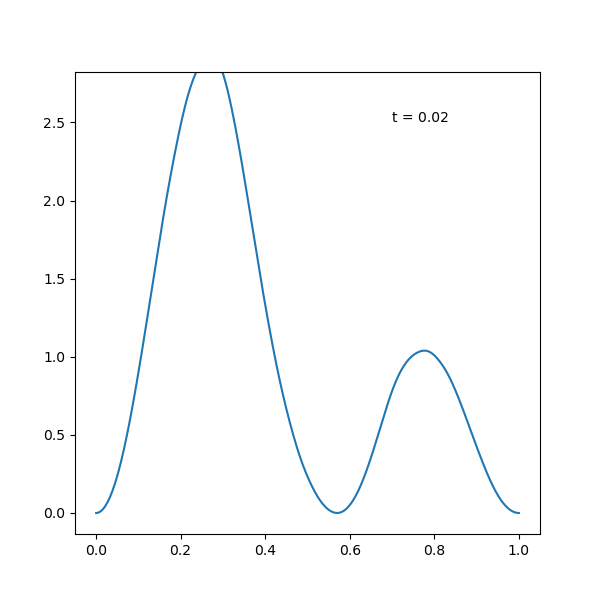

In [8]:
%matplotlib notebook

import matplotlib.animation as animation

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

x = np.linspace(0, 1, 1000)
y = np.abs(psi_t(x, 0.0))**2
line, = ax.plot(x, y)
text = ax.text(0.7, 2.5, f"t = 0")

def update(t):
    y = np.abs(psi_t(x, t))**2
    line.set_data(x, y)
    text.set_text(f"t = {t:.2f}")
    return line,

times = np.linspace(0, 0.5, 1000)
anim = animation.FuncAnimation(fig, update, times, blit=True, interval=10)

#anim.save('basic_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

plt.show()
